In [61]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aec77d53f7c99d51b9f2a6fb642faacb


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | verkhnyaya inta
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | egvekinot
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | abha
Processing Record 12 of Set 1 | mocambique
City not found. Skipping...
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | kalianget
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | meulaboh
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | burica
City not found. Skipping...
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | glendive
Processing Record 22 of Set 1 | 

City not found. Skipping...
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | ulaanbaatar
Processing Record 43 of Set 4 | avera
Processing Record 44 of Set 4 | humlebaek
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | lamovita
Processing Record 47 of Set 4 | san quintin
Processing Record 48 of Set 4 | nakamura
Processing Record 49 of Set 4 | mazyr
Processing Record 50 of Set 4 | parana
Processing Record 1 of Set 5 | tubruq
City not found. Skipping...
Processing Record 2 of Set 5 | vertientes
Processing Record 3 of Set 5 | margate
Processing Record 4 of Set 5 | nurota
Processing Record 5 of Set 5 | xiaoweizhai
Processing Record 6 of Set 5 | tromso
Processing Record 7 of Set 5 | starobaltachevo
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | vestmannaeyjar
Processing Record 10 of Set 5 | tuatapere
Processing Record 11 of Set 5 | aflu
City not found. Skipping...
Processing Record 12 o

Processing Record 29 of Set 8 | mandalgovi
Processing Record 30 of Set 8 | znamenskoye
Processing Record 31 of Set 8 | alice springs
Processing Record 32 of Set 8 | benton harbor
Processing Record 33 of Set 8 | moba
Processing Record 34 of Set 8 | bauchi
Processing Record 35 of Set 8 | tambura
Processing Record 36 of Set 8 | buqayq
City not found. Skipping...
Processing Record 37 of Set 8 | chilca
Processing Record 38 of Set 8 | tsabong
Processing Record 39 of Set 8 | tual
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | nhulunbuy
Processing Record 42 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 43 of Set 8 | ketchikan
Processing Record 44 of Set 8 | pacific grove
Processing Record 45 of Set 8 | codrington
Processing Record 46 of Set 8 | erzin
Processing Record 47 of Set 8 | mukhen
Processing Record 48 of Set 8 | trowbridge
Processing Record 49 of Set 8 | eyl
Processing Record 50 of Set 8 | huazolotitlan
City not found. Skipping.

Processing Record 17 of Set 12 | lanxi
Processing Record 18 of Set 12 | kutum
Processing Record 19 of Set 12 | ternate
Processing Record 20 of Set 12 | darasun
Processing Record 21 of Set 12 | kralendijk
Processing Record 22 of Set 12 | piacabucu
Processing Record 23 of Set 12 | nouakchott
Processing Record 24 of Set 12 | tilichiki
Processing Record 25 of Set 12 | muskogee
Processing Record 26 of Set 12 | saleaula
City not found. Skipping...
Processing Record 27 of Set 12 | manhattan
Processing Record 28 of Set 12 | la palma
Processing Record 29 of Set 12 | bud
Processing Record 30 of Set 12 | palu
Processing Record 31 of Set 12 | quatre cocos
Processing Record 32 of Set 12 | umm durman
City not found. Skipping...
Processing Record 33 of Set 12 | takahata
Processing Record 34 of Set 12 | tulsipur
Processing Record 35 of Set 12 | cotonou
Processing Record 36 of Set 12 | waipawa
Processing Record 37 of Set 12 | novoagansk
Processing Record 38 of Set 12 | vila velha
Processing Record 39 o

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verkhnyaya Inta,65.98,60.31,20.08,92,94,12.73,RU,2020-10-24 21:06:52
1,Vaini,-21.20,-175.20,73.40,88,75,10.29,TO,2020-10-24 21:06:53
2,Ribeira Grande,38.52,-28.70,66.20,93,40,17.22,PT,2020-10-24 21:06:53
3,Atuona,-9.80,-139.03,78.73,74,1,22.75,PF,2020-10-24 21:06:53
4,Hermanus,-34.42,19.23,62.01,91,6,4.00,ZA,2020-10-24 21:06:53
5,Barrow,71.29,-156.79,30.20,86,90,11.41,US,2020-10-24 21:04:08
6,Egvekinot,66.32,-179.17,21.87,96,15,8.93,RU,2020-10-24 21:03:11
7,Provideniya,64.38,-173.30,33.82,89,76,15.21,RU,2020-10-24 21:06:54
8,Tiksi,71.69,128.87,12.07,92,99,24.23,RU,2020-10-24 21:02:36
9,Rikitea,-23.12,-134.97,74.64,83,84,22.82,PF,2020-10-24 21:06:54


In [36]:
new_order_data_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order_data_df]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Verkhnyaya Inta,RU,2020-10-24 21:06:52,65.98,60.31,20.08,92,94,12.73
1,Vaini,TO,2020-10-24 21:06:53,-21.20,-175.20,73.40,88,75,10.29
2,Ribeira Grande,PT,2020-10-24 21:06:53,38.52,-28.70,66.20,93,40,17.22
3,Atuona,PF,2020-10-24 21:06:53,-9.80,-139.03,78.73,74,1,22.75
4,Hermanus,ZA,2020-10-24 21:06:53,-34.42,19.23,62.01,91,6,4.00
...,...,...,...,...,...,...,...,...,...
549,Paramirim,BR,2020-10-24 21:08:59,-13.44,-42.24,81.84,45,100,3.80
550,Husavik,IS,2020-10-24 21:08:59,66.04,-17.34,41.00,75,90,19.46
551,Grand Forks,US,2020-10-24 21:08:59,47.94,-97.43,30.20,58,90,5.82
552,Kutoarjo,ID,2020-10-24 21:09:00,-7.72,109.91,63.00,87,100,4.47


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [45]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/24/20'

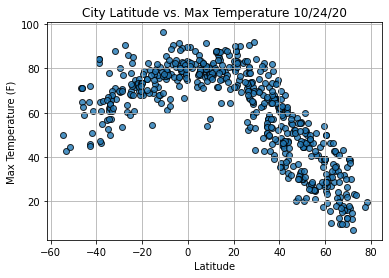

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

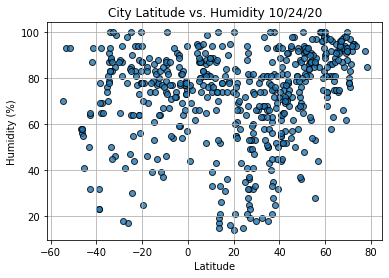

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

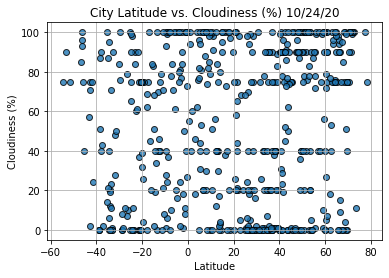

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

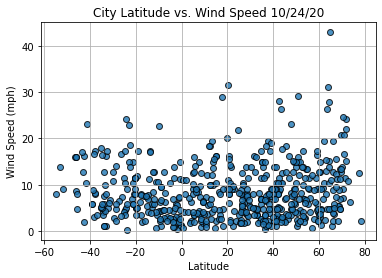

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [69]:
from scipy.stats import linregress

In [70]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [105]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title("Linear Regression on the Northern Hemisphere for Maximum Temperature")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

R-squared: 0.768459


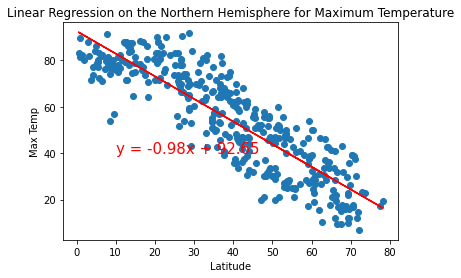

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
        'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [103]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title("Linear Regression on the Soutthern Hemisphere for Maximum Temperature")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

R-squared: 0.398418


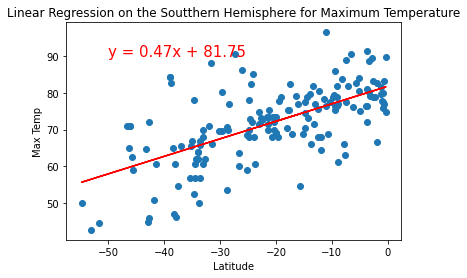

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))



In [115]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    plt.title("Linear Regression on the Northern Hemisphere for % Humidity")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

R-squared: 0.102769


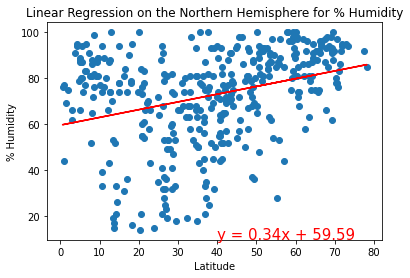

In [116]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

In [117]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    plt.title("Linear Regression on the Southern Hemisphere for % Humidity")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

R-squared: 0.013587


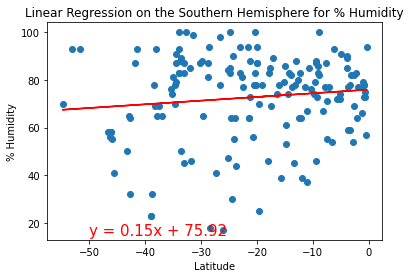

In [118]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [119]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    plt.title("Linear Regression on the Northern Hemisphere for % Cloudiness")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

R-squared: 0.019290


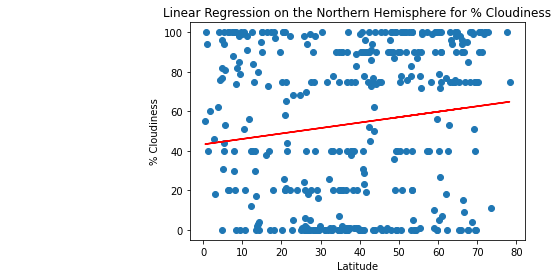

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [121]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    plt.title("Linear Regression on the Southern Hemisphere for % Cloudiness")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

R-squared: 0.010073


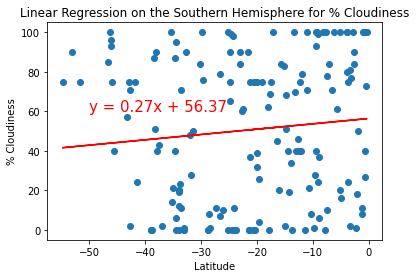

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [123]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    plt.title("Linear Regression on the Northern Hemisphere for Wind Speed")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

R-squared: 0.027486


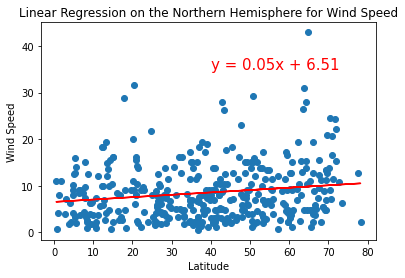

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [125]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    plt.title("Linear Regression on the Southern Hemisphere for Wind Speed")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

R-squared: 0.090123


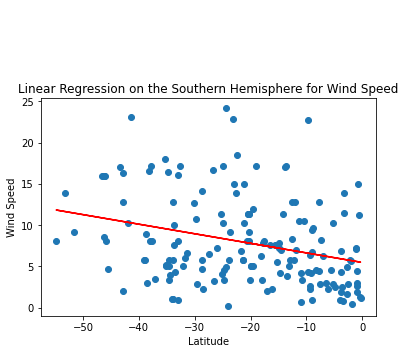

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))